In [1]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

1. Обрати декiлька (3+) зображень, без вираженого шуму.

In [2]:
img_1 = cv2.imread("/Users/artemakubec/Downloads/прога/int-to-comp-vision/lab4/img/img_g.jpg")
img_2 = cv2.imread("/Users/artemakubec/Downloads/прога/int-to-comp-vision/lab4/img/img_b.png")
img_3 = cv2.imread("/Users/artemakubec/Downloads/прога/int-to-comp-vision/lab4/img/img_n.jpg")

2. Для кожного зображення додати типи шуму:

In [3]:
def add_salt_pepper_noise(image, prob=0.03):
    thres = 1 - prob
    noisy_image = np.copy(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = np.random.random()
            if rdn < prob:
                noisy_image[i, j, :] = [0, 0, 0]
            elif rdn > thres:
                noisy_image[i, j, :] = [255, 255, 255]
    return noisy_image

In [4]:
def add_gaussian_noise(image, mean=0, var=25):
    row, col, ch = image.shape
    sigma = var**0.5
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy_image = image + gauss.reshape(row, col, ch)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

3. Для кожного зображення застосувати методи видалення шуму:

In [5]:
def box_average_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

In [6]:
def median_filter(image, kernel_size=3):
    return cv2.medianBlur(image, kernel_size)

In [7]:
def weighted_median_filter(image, kernel_size=3):
    temp_image = cv2.copyMakeBorder(image, kernel_size//2, kernel_size//2, kernel_size//2, kernel_size//2, cv2.BORDER_CONSTANT)
    filtered_image = np.zeros_like(image)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                neighborhood = temp_image[i:i+kernel_size, j:j+kernel_size, k].flatten()
                neighborhood.sort()
                filtered_image[i, j, k] = neighborhood[kernel_size**2 // 2]
    
    return filtered_image

In [8]:
noisy_img_1_salt_pepper = add_salt_pepper_noise(img_1)
noisy_img_1_gaussian = add_gaussian_noise(img_1)

noisy_img_2_salt_pepper = add_salt_pepper_noise(img_2)
noisy_img_2_gaussian = add_gaussian_noise(img_2)

noisy_img_3_salt_pepper = add_salt_pepper_noise(img_3)
noisy_img_3_gaussian = add_gaussian_noise(img_3)

filtered_img_1_box_salt_pepper = box_average_filter(noisy_img_1_salt_pepper)
filtered_img_1_median_salt_pepper = median_filter(noisy_img_1_salt_pepper)
filtered_img_1_weighted_median_salt_pepper = weighted_median_filter(noisy_img_1_salt_pepper)

filtered_img_1_box_gaussian = box_average_filter(noisy_img_1_gaussian)
filtered_img_1_median_gaussian = median_filter(noisy_img_1_gaussian)
filtered_img_1_weighted_median_gaussian = weighted_median_filter(noisy_img_1_gaussian)

filtered_img_2_box_salt_pepper = box_average_filter(noisy_img_2_salt_pepper)
filtered_img_2_median_salt_pepper = median_filter(noisy_img_2_salt_pepper)
filtered_img_2_weighted_median_salt_pepper = weighted_median_filter(noisy_img_2_salt_pepper)

filtered_img_2_box_gaussian = box_average_filter(noisy_img_2_gaussian)
filtered_img_2_median_gaussian = median_filter(noisy_img_2_gaussian)
filtered_img_2_weighted_median_gaussian = weighted_median_filter(noisy_img_2_gaussian)

filtered_img_3_box_salt_pepper = box_average_filter(noisy_img_3_salt_pepper)
filtered_img_3_median_salt_pepper = median_filter(noisy_img_3_salt_pepper)
filtered_img_3_weighted_median_salt_pepper = weighted_median_filter(noisy_img_3_salt_pepper)

filtered_img_3_box_gaussian = box_average_filter(noisy_img_3_gaussian)
filtered_img_3_median_gaussian = median_filter(noisy_img_3_gaussian)
filtered_img_3_weighted_median_gaussian = weighted_median_filter(noisy_img_3_gaussian)

4. Порiвняти результати

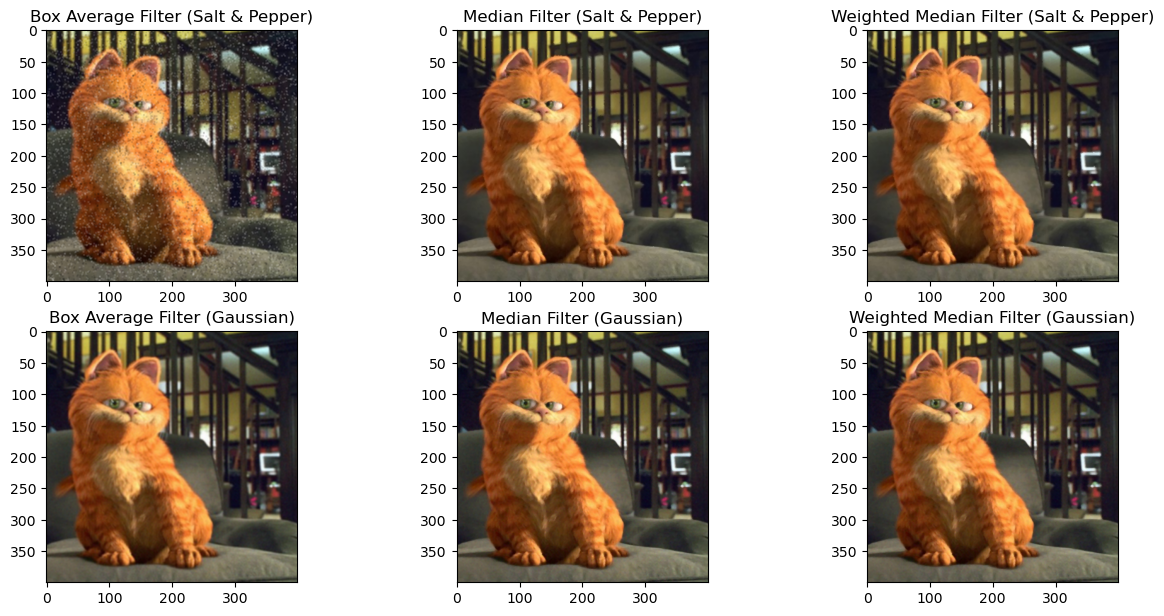

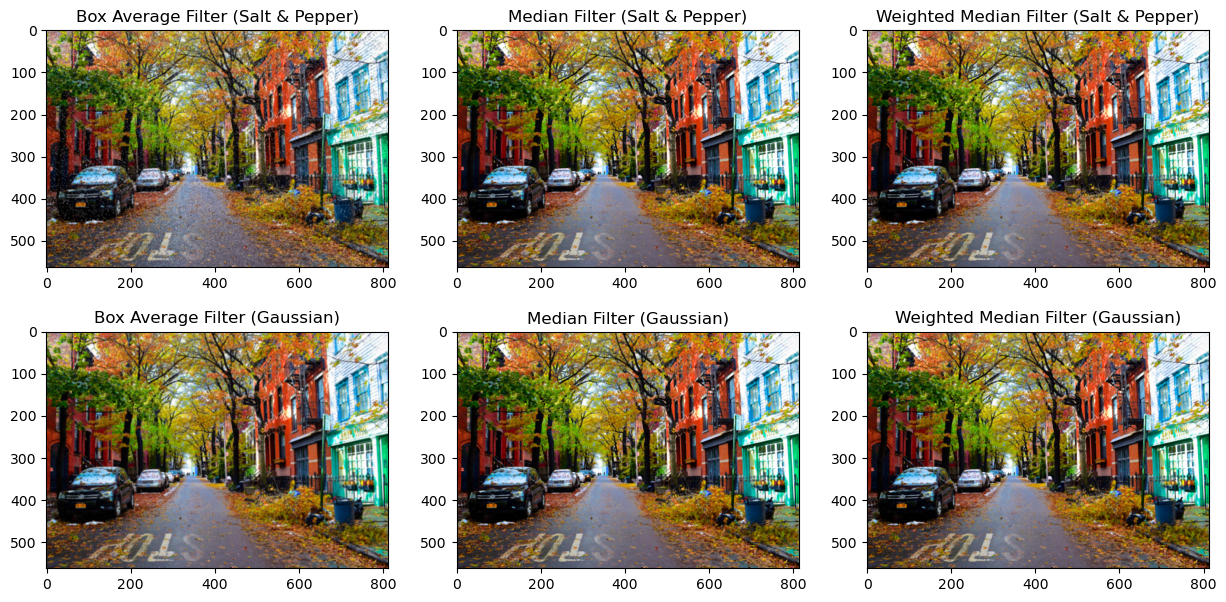

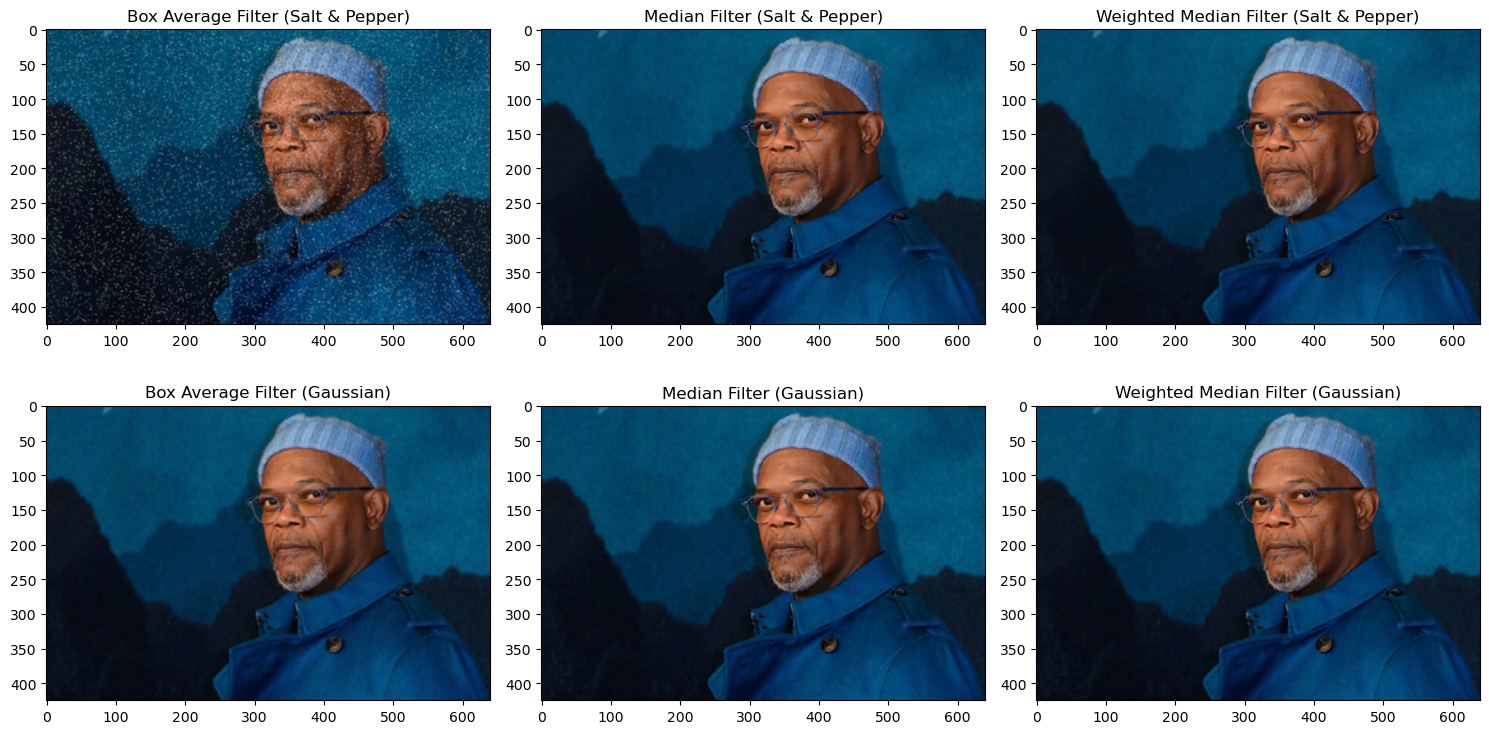

In [9]:
plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 4)
plt.imshow(cv2.cvtColor(filtered_img_1_box_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Box Average Filter (Salt & Pepper)')

plt.subplot(4, 3, 5)
plt.imshow(cv2.cvtColor(filtered_img_1_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (Salt & Pepper)')

plt.subplot(4, 3, 6)
plt.imshow(cv2.cvtColor(filtered_img_1_weighted_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Weighted Median Filter (Salt & Pepper)')

plt.subplot(4, 3, 7)
plt.imshow(cv2.cvtColor(filtered_img_1_box_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Box Average Filter (Gaussian)')

plt.subplot(4, 3, 8)
plt.imshow(cv2.cvtColor(filtered_img_1_median_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (Gaussian)')

plt.subplot(4, 3, 9)
plt.imshow(cv2.cvtColor(filtered_img_1_weighted_median_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Weighted Median Filter (Gaussian)')

plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 4)
plt.imshow(cv2.cvtColor(filtered_img_2_box_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Box Average Filter (Salt & Pepper)')

plt.subplot(4, 3, 5)
plt.imshow(cv2.cvtColor(filtered_img_2_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (Salt & Pepper)')

plt.subplot(4, 3, 6)
plt.imshow(cv2.cvtColor(filtered_img_2_weighted_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Weighted Median Filter (Salt & Pepper)')

plt.subplot(4, 3, 7)
plt.imshow(cv2.cvtColor(filtered_img_2_box_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Box Average Filter (Gaussian)')

plt.subplot(4, 3, 8)
plt.imshow(cv2.cvtColor(filtered_img_2_median_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (Gaussian)')

plt.subplot(4, 3, 9)
plt.imshow(cv2.cvtColor(filtered_img_2_weighted_median_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Weighted Median Filter (Gaussian)')

plt.figure(figsize=(15, 15))

plt.subplot(4, 3, 4)
plt.imshow(cv2.cvtColor(filtered_img_3_box_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Box Average Filter (Salt & Pepper)')

plt.subplot(4, 3, 5)
plt.imshow(cv2.cvtColor(filtered_img_3_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (Salt & Pepper)')

plt.subplot(4, 3, 6)
plt.imshow(cv2.cvtColor(filtered_img_3_weighted_median_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Weighted Median Filter (Salt & Pepper)')

plt.subplot(4, 3, 7)
plt.imshow(cv2.cvtColor(filtered_img_3_box_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Box Average Filter (Gaussian)')

plt.subplot(4, 3, 8)
plt.imshow(cv2.cvtColor(filtered_img_3_median_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Median Filter (Gaussian)')

plt.subplot(4, 3, 9)
plt.imshow(cv2.cvtColor(filtered_img_3_weighted_median_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Weighted Median Filter (Gaussian)')

plt.tight_layout()
plt.show()